# Intim im Team Notebook

# Data Preparation

### Imports 

In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt #for working with times objects

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins
from folium.plugins import HeatMap
import random

# For working with regression
import sklearn
import warnings
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# For evaluating regression algorithms
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For working with polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

### Reading in the Chicago 2018 dataset 

In [2]:
chicago_set = pd.read_csv("chicago_2018.csv", low_memory = False)

#converting start and end time into timestamps

chicago_set['start_time'] = pd.DatetimeIndex(chicago_set['start_time'])
chicago_set['end_time'] = pd.DatetimeIndex(chicago_set['end_time'])

In [3]:
#adding the exact_duration to the dataframe
chicago_set["exact_duration"] = chicago_set["end_time"]-chicago_set["start_time"]

chicago_set

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49
...,...,...,...,...,...,...,...,...,...
3603077,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50
3603078,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22
3603079,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20
3603080,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47


### Removing trips that lasted longer than 24 hours

In [4]:
# drop cells where duration is over 24h

chicago_set_dropLt = chicago_set[chicago_set["exact_duration"].apply(lambda x: x.total_seconds()) < (24*60*60)]

chicago_set_dropLt.reset_index(drop=True, inplace=True)
chicago_set_dropLt

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49
...,...,...,...,...,...,...,...,...,...
3601568,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50
3601569,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22
3601570,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20
3601571,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47


In [5]:
#how many lines were dropped
lines_dropped = len(chicago_set_dropLt)-len(chicago_set)
print("{} lines were dropped.".format(lines_dropped))

-1509 lines were dropped.


### Removing round trips to same station and under 3 minutes 

In [6]:
# same start and end-stations and duration 3 min or below

chicago_set_dropSrt = chicago_set_dropLt[((chicago_set_dropLt["start_station_id"] == chicago_set_dropLt["end_station_id"])
                               & (chicago_set_dropLt["exact_duration"].apply(lambda x: x.total_seconds()) > (3*60)))
                               | (chicago_set_dropLt["start_station_id"] != chicago_set_dropLt["end_station_id"])]
chicago_set_dropSrt.reset_index(drop=True, inplace=True)
chicago_set_dropSrt

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49
...,...,...,...,...,...,...,...,...,...
3589933,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50
3589934,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22
3589935,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20
3589936,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47


In [7]:
#how many lines were dropped
lines_dropped = len(chicago_set_dropLt)-len(chicago_set_dropSrt)
print("{} lines were dropped.".format(lines_dropped))

11635 lines were dropped.


### Removing short trips under 3 min 

In [130]:
# trips under 3min
# drop cells where exact_duration is under 1min
chicago_set_dropOm = chicago_set_dropSrt[chicago_set_dropSrt["exact_duration"].apply(lambda x: x.total_seconds()) > 59]

#how many lines were dropped
lines_dropped = len(chicago_set_dropSrt)-len(chicago_set_dropOm)
print("{} lines were dropped.".format(lines_dropped))
print(len(chicago_set_dropOm))

7 lines were dropped.
3589931


### Remove rows with null values 

In [9]:
#rows with null values
# drop rows which have null values

chicago_set_dropNv = chicago_set_dropOm.dropna(axis=0, inplace=False)
chicago_set_dropNv

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49
...,...,...,...,...,...,...,...,...,...
3589933,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50
3589934,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22
3589935,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20
3589936,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47


### How many lines were dropped in total?  

In [10]:
#how many lines were dropped
lines_dropped = len(chicago_set)-len(chicago_set_dropNv)
print("{} lines were dropped.".format(lines_dropped))

13151 lines were dropped.


### Saving the cleaned dataframe in the original dataset

In [11]:
chicago_set = chicago_set_dropNv

#reset indices
chicago_set.reset_index(drop=True)
chicago_set

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49
...,...,...,...,...,...,...,...,...,...
3589933,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50
3589934,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22
3589935,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20
3589936,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47


### Saving the dataset in the folderm for usability 

In [12]:
chicago_set.to_pickle("chicago_set.pkl")

# 

# Task 1: Customer Behaviour Analytics

In [13]:
#Reading in the cleansed data
chicago_set = pd.read_pickle("chicago_set.pkl")
chicago_set

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49
...,...,...,...,...,...,...,...,...,...
3589933,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50
3589934,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22
3589935,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20
3589936,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47


In [14]:
chicago_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3589931 entries, 0 to 3589937
Data columns (total 9 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   exact_duration      timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 273.9+ MB


In [15]:
# Get the amount of bikes and the amount of stations

bike_amount = len(chicago_set["bike_id"].unique())
station_amount = len(chicago_set["start_station_id"].unique())

#print("The Chicago set consists of {} bikes".format(bike_amount), "and there are {} stations, which were used in 2018.".format(station_amount))

The Chicago set consists of 6133 bikes and there are 621 stations, which were used in 2018.

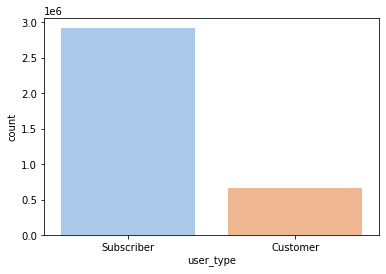

In [16]:
sns.countplot(x="user_type",data=chicago_set, palette="pastel")

plt.show()

In [17]:
# Amount of bike rentings grouped by date
day_demand = pd.DataFrame({'amount': chicago_set.groupby(chicago_set['start_time'].apply(lambda x: x.date())).size()})

day_demand.reset_index(inplace=True)
day_demand = day_demand.rename(columns = {'start_time':'date'})
day_demand['weekday'] = day_demand['date'].apply(lambda x: x.weekday())
day_demand["user types"] = chicago_set["user_type"]

day_demand

,date,amount,weekday,user types
0,2018-01-01,374,0,Subscriber
1,2018-01-02,1635,1,Subscriber
2,2018-01-03,2488,2,Customer
3,2018-01-04,2414,3,Subscriber
4,2018-01-05,2222,4,Subscriber
...,...,...,...,...
360,2018-12-27,2327,3,Subscriber
361,2018-12-28,3206,4,Subscriber
362,2018-12-29,1338,5,Customer
363,2018-12-30,1578,6,Subscriber


# Demand over the months, week, day, hours 

## Demand over the months

In [18]:
# Getting the monthly demand
month_demand = pd.DataFrame({'amount': chicago_set.groupby
                             (by=[chicago_set['start_time'].apply(lambda x: x.date()),
                             chicago_set['start_time'].apply(lambda x: x.month)]).size()})

month_demand.reset_index(level=0, inplace=True)
month_demand = month_demand.rename(columns = {'start_time':'date'})
month_demand.reset_index(inplace=True)
month_demand = month_demand.rename(columns = {'start_time':'month'})
month_demand["user_type"] = chicago_set["user_type"] 

month_demand

,month,date,amount,user_type
0,1,2018-01-01,374,Subscriber
1,1,2018-01-02,1635,Subscriber
2,1,2018-01-03,2488,Customer
3,1,2018-01-04,2414,Subscriber
4,1,2018-01-05,2222,Subscriber
...,...,...,...,...
360,12,2018-12-27,2327,Subscriber
361,12,2018-12-28,3206,Subscriber
362,12,2018-12-29,1338,Customer
363,12,2018-12-30,1578,Subscriber


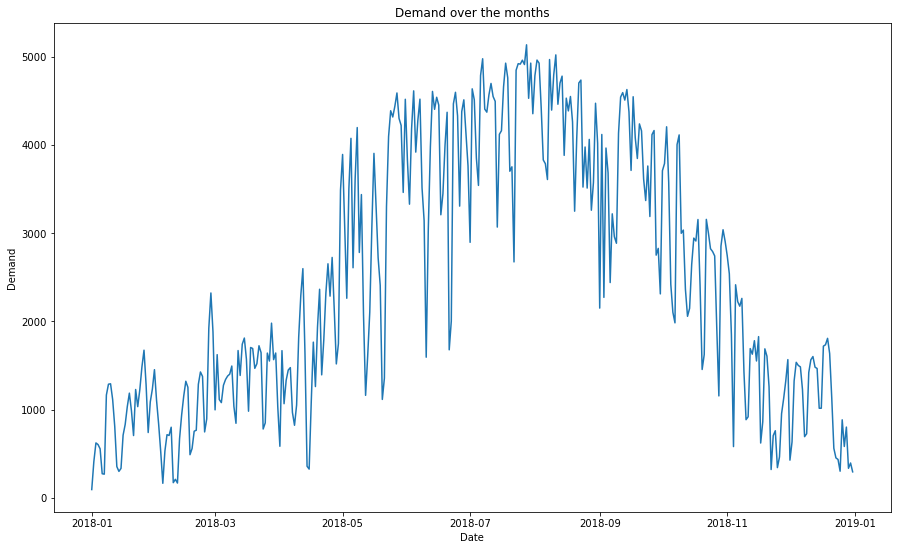

In [19]:
# Getting the demand over the months
fig, ax = plt.subplots(figsize = (15,9))

# Plotting the data
ax.plot(day_demand["date"],day_demand[["amount"]]/4)
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
ax.set_title("Demand over the months")

plt.show()

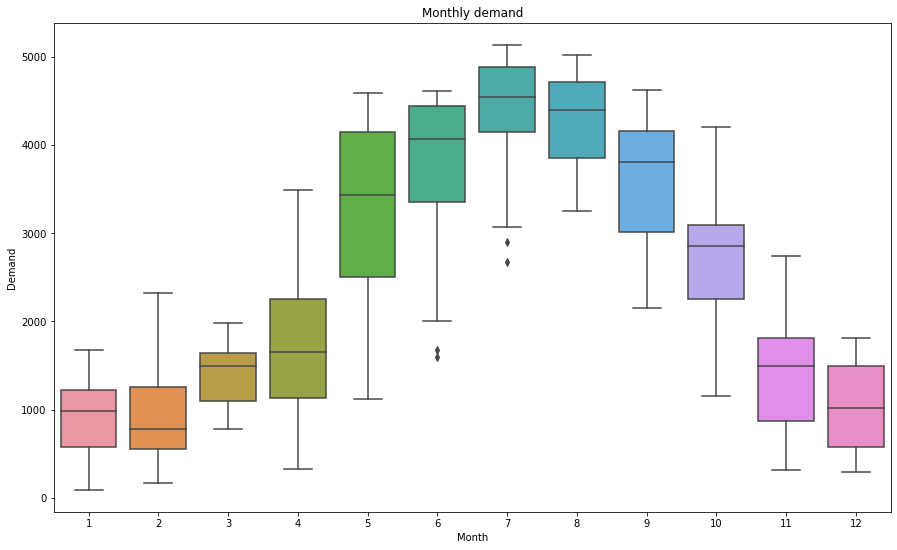

In [20]:
# Using a boxplot visualization for the monthly demand
fig,ax = plt.subplots(figsize=(15,9))

sns.boxplot(x=month_demand["month"], y=month_demand["amount"]/4, ax=ax)

ax.set_xlabel("Month")
ax.set_ylabel("Demand")
ax.set_title("Monthly demand")

plt.show()

## Demand between Customers and Subscribers 

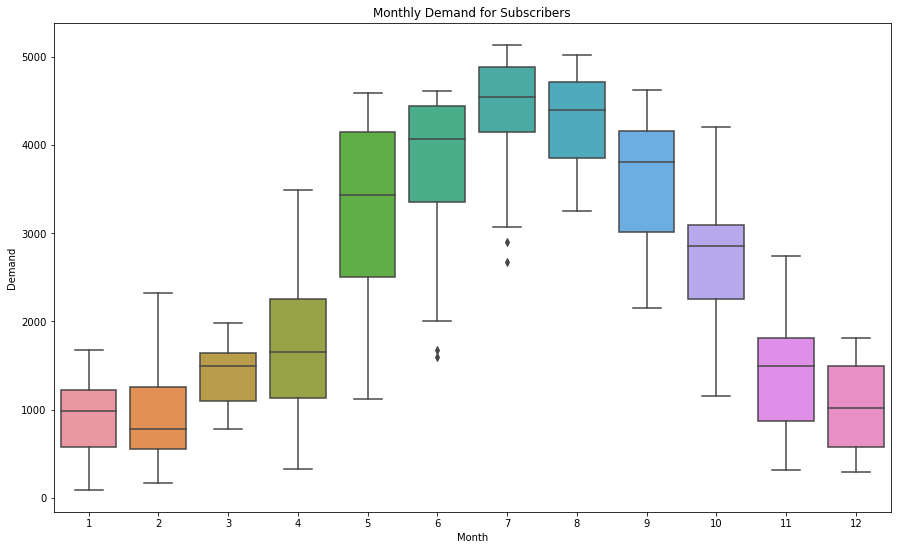

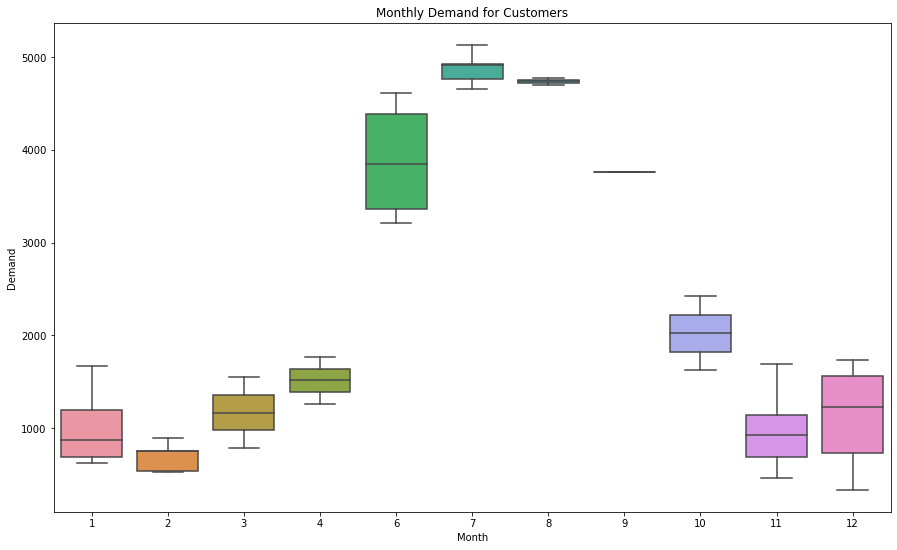

In [21]:
# Getting the different demands per user type to see if there are any differences


# Monthly demand of Subscribers

fig,ax = plt.subplots(figsize=(15,9))

month_demand_mp = month_demand[(month_demand["user_type"] == "Subscriber")]
sns.boxplot(x=month_demand["month"], y=month_demand["amount"]/4, ax=ax)

ax.set_xlabel("Month")
ax.set_ylabel("Demand")
ax.set_title("Monthly Demand for Subscribers")

plt.show()

# Monthly demand of Customers

fig,ax = plt.subplots(figsize=(15,9))

month_demand_wu = month_demand[(month_demand["user_type"] == "Customer")]
sns.boxplot(x=month_demand_wu["month"], y=month_demand_wu["amount"]/4, ax=ax)

ax.set_xlabel("Month")
ax.set_ylabel("Demand")
ax.set_title("Monthly Demand for Customers")

plt.show()

# 

## Demand over the week 

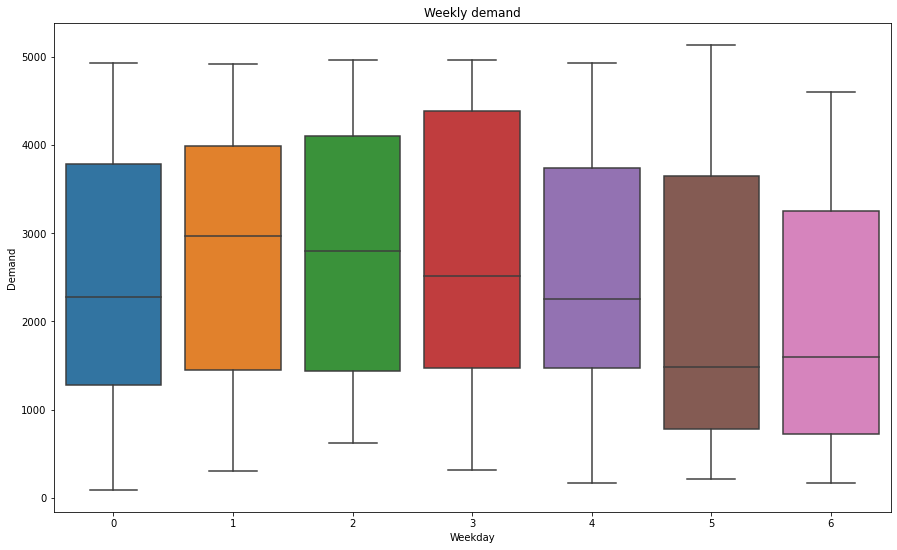

In [22]:
# Getting the demand over the week

fig,ax = plt.subplots(figsize=(15,9)) 
sns.boxplot(x=day_demand['weekday'], y=day_demand["amount"]/4,ax=ax)

ax.set_xlabel("Weekday")
ax.set_ylabel("Demand")
ax.set_title("Weekly demand")

plt.show()

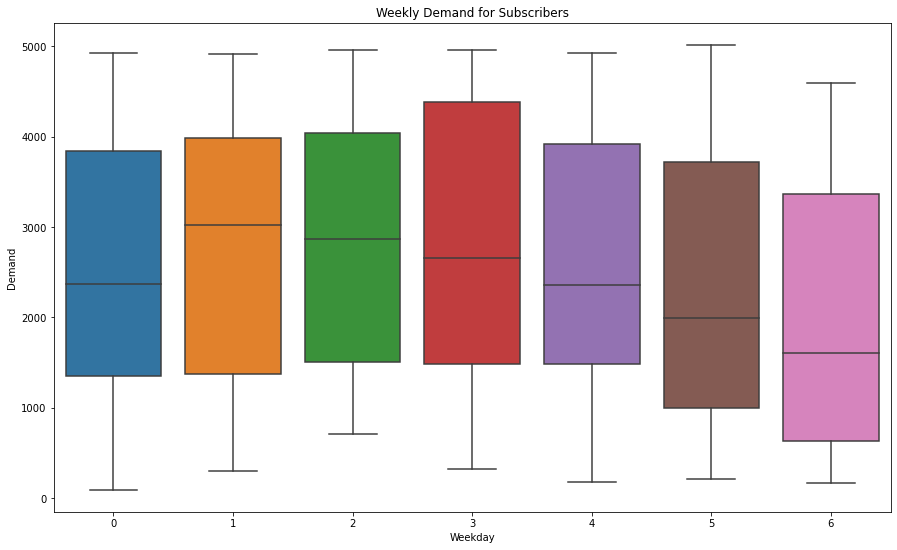

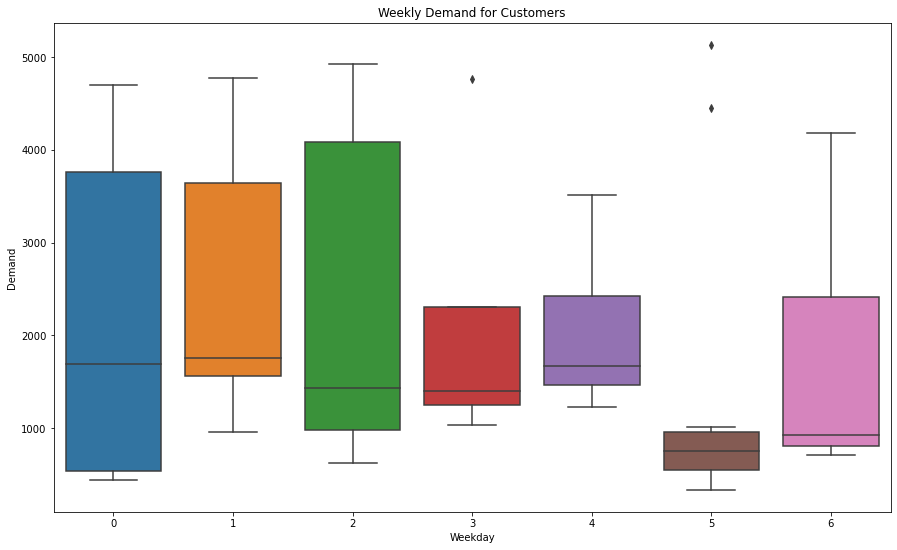

In [23]:
# Getting the different demands per user type, to see if there are any differences

# Demand per week of Subscribers

fig,ax = plt.subplots(figsize=(15,9)) 

day_demand_mp = day_demand[(day_demand["user types"] == "Subscriber")]
sns.boxplot(x=day_demand_mp['weekday'], y=day_demand_mp["amount"]/4,ax=ax)

ax.set_xlabel("Weekday")
ax.set_ylabel("Demand")
ax.set_title("Weekly Demand for Subscribers")

plt.show()

# Demand per week of Customers 

fig,ax = plt.subplots(figsize=(15,9)) 

day_demand_wu = day_demand[(day_demand["user types"] == "Customer")]
sns.boxplot(x=day_demand_wu['weekday'], y=day_demand_wu["amount"]/4,ax=ax)

ax.set_xlabel("Weekday")
ax.set_ylabel("Demand")
ax.set_title("Weekly Demand for Customers")

plt.show()

# 

## Demand over the Hour 

In [24]:
def get_total_hours (td):
    return (int)(td.total_seconds() / 3600)

def get_total_minute (td):
    return (int)(td.total_seconds() / 60)

In [25]:
# Getting the demand per hour

hour_demand = pd.DataFrame({'amount': chicago_set.groupby(by=[chicago_set['start_time'].apply(lambda x: x.date()),
                                 chicago_set['start_time'].apply(lambda x: x.hour)]).size()})

hour_demand.reset_index(level=0, inplace=True)

hour_demand = hour_demand.rename(columns = {'start_time':'date_time'})
hour_demand.reset_index(inplace=True)
hour_demand = hour_demand.rename(columns = {'start_time':'hour'})
hour_demand['bike_amount']= bike_amount
hour_demand['user types'] = chicago_set['user_type']

hour_demand


,hour,date_time,amount,bike_amount,user types
0,0,2018-01-01,7,6133,Subscriber
1,1,2018-01-01,14,6133,Subscriber
2,2,2018-01-01,10,6133,Customer
3,3,2018-01-01,2,6133,Subscriber
4,4,2018-01-01,2,6133,Subscriber
...,...,...,...,...,...
8739,19,2018-12-31,41,6133,Subscriber
8740,20,2018-12-31,28,6133,Subscriber
8741,21,2018-12-31,22,6133,Subscriber
8742,22,2018-12-31,25,6133,Subscriber


In [26]:
hour_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8744 entries, 0 to 8743
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hour         8744 non-null   int64 
 1   date_time    8744 non-null   object
 2   amount       8744 non-null   int64 
 3   bike_amount  8744 non-null   int64 
 4   user types   8744 non-null   object
dtypes: int64(3), object(2)
memory usage: 341.7+ KB


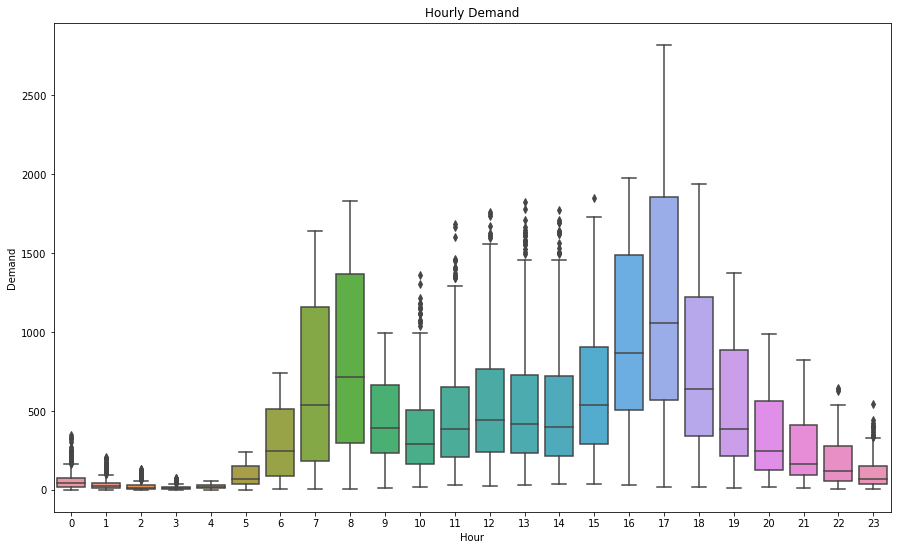

In [27]:
#Demand per hour overall
fig,ax = plt.subplots(figsize=(15,9))

sns.boxplot(x=hour_demand["hour"], y=hour_demand["amount"], ax=ax)
ax.set_xlabel("Hour")
ax.set_ylabel("Demand")
ax.set_title("Hourly Demand")

plt.show()

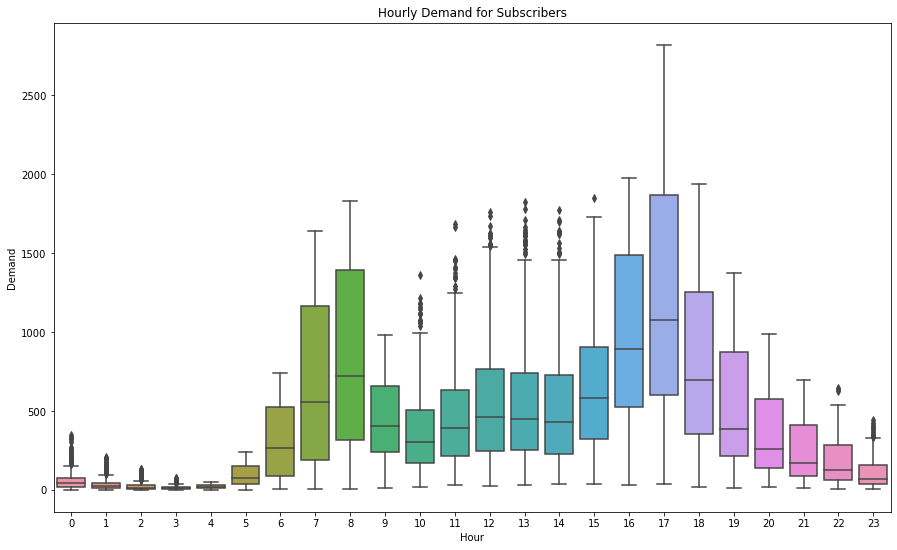

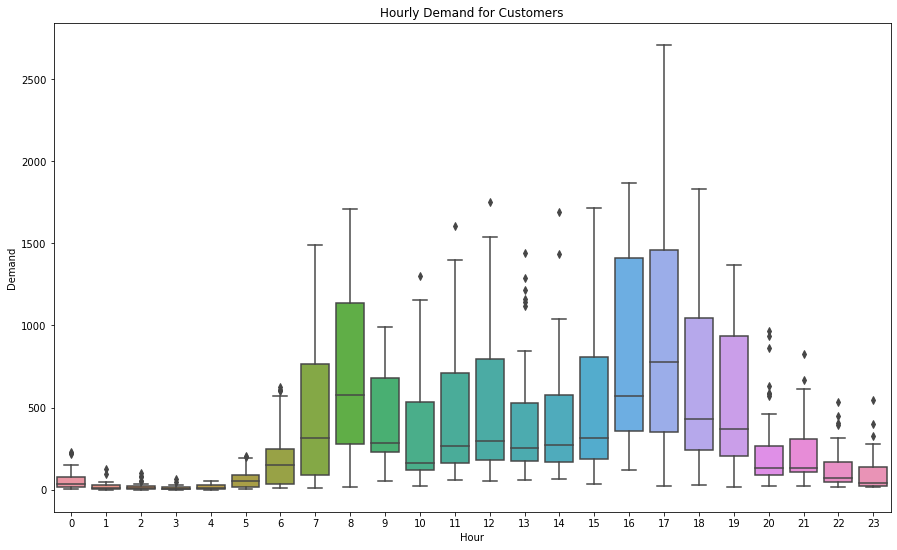

In [28]:
#Demand per hour for Subscribers
fig,ax = plt.subplots(figsize=(15,9))

hour_demand_mp = hour_demand[(hour_demand["user types"] == "Subscriber")]
sns.boxplot(x=hour_demand_mp["hour"], y=(hour_demand_mp["amount"]))

ax.set_xlabel("Hour")
ax.set_ylabel("Demand")
ax.set_title("Hourly Demand for Subscribers")

plt.show()

#Demand per hour for Customers
fig,ax = plt.subplots(figsize=(15,9))

hour_demand_wu = hour_demand[(hour_demand["user types"] == "Customer")]
sns.boxplot(x=hour_demand_wu["hour"], y=(hour_demand_wu["amount"]))

ax.set_xlabel("Hour")
ax.set_ylabel("Demand")
ax.set_title("Hourly Demand for Customers")

plt.show()

# 

# Locations, Departures and Destinations

##  Station Amount and Station Popularity

In [29]:
start_stations = list(chicago_set["start_station_id"].unique())
end_stations = list(chicago_set["end_station_id"].unique())
print("There are", len(start_stations), "start stations, and", len(end_stations), "end stations")

There are 621 start stations, and 618 end stations


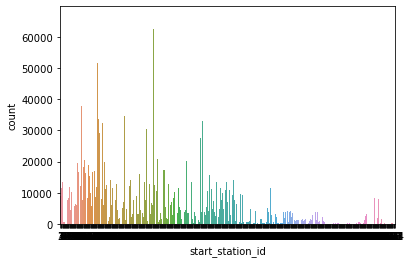

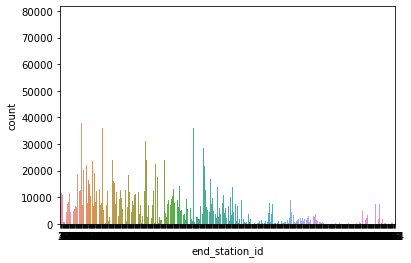

In [30]:
#Which start and end stations are used the most?

# Startstations
sns.countplot(x = "start_station_id", data = chicago_set)
plt.show()

# Endstations
sns.countplot(x = "end_station_id", data = chicago_set)
plt.show()

In [31]:
station_mostUsed = chicago_set["start_station_id"].value_counts().idxmax()
print("The most used start station is the station with id", station_mostUsed)

The most used start station is the station with id 35


In [32]:
station_mostUsed = chicago_set["end_station_id"].value_counts().idxmax()
print("The most used end station is the station with id", station_mostUsed)

The most used end station is the station with id 35


## Visualizing the Stations 

Dataset to get the Lat/Longitude of the stations

In [33]:
stations = pd.read_csv("/Users/gerialiaj/Desktop/Uni/6.Semester/DSML/Projekt/Divvy_Bicycle_Stations_-_In_Service.csv")

In [34]:
stations.head(1000)

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.877505,-87.704850,"(41.877505, -87.70485)"
1,2,Buckingham Fountain (Temp),39,39,In Service,41.869621,-87.623981,"(41.86962074748123, -87.6239812374115)"
2,342,Wolcott Ave & Polk St,23,23,In Service,41.871262,-87.673688,"(41.871262, -87.673688)"
3,1673852313397164648,Public Rack - Francisco Ave & Touhy Ave,10,10,In Service,42.011865,-87.701317,"(42.011865, -87.701317)"
4,644,Western Ave & Fillmore St,11,11,In Service,41.868563,-87.686234,"(41.868563, -87.686234)"
...,...,...,...,...,...,...,...,...
995,1674190162237597976,Ashland Ave & 45th St - midblock south,10,10,In Service,41.811169,-87.664740,"(41.811169, -87.66474)"
996,1674190544489687990,Oleander Ave & Addison St,10,10,In Service,41.944983,-87.815865,"(41.944983, -87.815865)"
997,1674190596029295624,Rhodes Ave & 79th St,10,10,In Service,41.751058,-87.611439,"(41.751058, -87.611439)"
998,1674190621799099448,Stewart Ave & 123rd St,10,10,In Service,41.670563,-87.632188,"(41.670563, -87.632188)"


Merging both sets together

In [35]:
merged_set = pd.merge(chicago_set, stations, left_on = "start_station_id", right_on = "ID")

In [36]:
merged_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)"
1,2018-04-01 11:21:46,2018-04-01 11:30:46,22,103,May St & Taylor St,Clinton St & Polk St (*),595,Subscriber,0 days 00:09:00,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)"
2,2018-04-01 11:40:54,2018-04-01 11:47:45,22,342,May St & Taylor St,Wolcott Ave & Polk St,6457,Subscriber,0 days 00:06:51,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)"
3,2018-04-01 15:22:44,2018-04-01 15:40:08,22,47,May St & Taylor St,State St & Kinzie St,5797,Subscriber,0 days 00:17:24,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)"
4,2018-04-01 15:22:44,2018-04-01 15:40:08,22,47,May St & Taylor St,State St & Kinzie St,2295,Subscriber,0 days 00:17:24,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)"


Adding column "coordinates" because folium doesnt plot the lat and long variables (probably to many digits after decimal point)

In [37]:
merged_set["Coordinates"] = list(zip(merged_set["Latitude"].round(4), merged_set["Longitude"].round(4)))

In [38]:
merged_set.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location,Coordinates
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
1,2018-04-01 11:21:46,2018-04-01 11:30:46,22,103,May St & Taylor St,Clinton St & Polk St (*),595,Subscriber,0 days 00:09:00,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
2,2018-04-01 11:40:54,2018-04-01 11:47:45,22,342,May St & Taylor St,Wolcott Ave & Polk St,6457,Subscriber,0 days 00:06:51,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
3,2018-04-01 15:22:44,2018-04-01 15:40:08,22,47,May St & Taylor St,State St & Kinzie St,5797,Subscriber,0 days 00:17:24,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
4,2018-04-01 15:22:44,2018-04-01 15:40:08,22,47,May St & Taylor St,State St & Kinzie St,2295,Subscriber,0 days 00:17:24,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
5,2018-04-01 15:35:48,2018-04-01 15:42:34,22,108,May St & Taylor St,Halsted St & Polk St,6092,Subscriber,0 days 00:06:46,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
6,2018-04-01 18:23:51,2018-04-01 18:26:44,22,241,May St & Taylor St,Morgan St & Polk St,4913,Subscriber,0 days 00:02:53,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
7,2018-04-01 22:36:11,2018-04-01 22:39:46,22,320,May St & Taylor St,Loomis St & Lexington St,1616,Subscriber,0 days 00:03:35,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
8,2018-04-02 08:10:35,2018-04-02 08:15:39,22,317,May St & Taylor St,Wood St & Taylor St,4179,Subscriber,0 days 00:05:04,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"
9,2018-04-02 10:34:34,2018-04-02 10:42:58,22,414,May St & Taylor St,Canal St & Taylor St,1894,Subscriber,0 days 00:08:24,22,May St & Taylor St,15,15,In Service,41.869482,-87.655486,"(41.8694821, -87.6554864)","(41.8695, -87.6555)"


## Heatmap 

In [39]:
# counting the number of start and end stations
count_start = chicago_set["start_station_name"].value_counts()
count_end = chicago_set["end_station_name"].value_counts()

In [40]:
# aggregating; started trip and ended trip is one total trip
total_trips = count_start.to_frame().merge(count_end,left_on=count_start.index,right_on=count_end.index,how="outer")
total_trips = total_trips.rename(columns={"key_0":"station_name","end_station_name":"ended_trips","start_station_name":"started_trips"})

# setting null values to 0
total_trips = total_trips.fillna(value=0)

# adding trips column
total_trips["trips"] = total_trips["ended_trips"]+total_trips["started_trips"]
total_trips.head()

#adding coordinates to stations
merged_set["name"] = total_trips["station_name"]

merged_set["station_coordinates"] = list(zip(merged_set["Latitude"],merged_set["Longitude"]))
total_trips = total_trips.merge(merged_set["station_coordinates"].to_frame(),how = "left",left_on=total_trips["station_name"],right_on=merged_set["name"])
total_trips = total_trips.drop(columns = ['key_0'])

#Drop NaN values
#total_trips = total_trips.dropna()

#Reset indices
#total_trips = total_trips.reset_index(drop = True)

#dropping stations without location data
total_trips = total_trips.dropna(axis=0)
total_trips = total_trips.sort_values(by="trips",ascending=False)
total_trips.head(10)

,station_name,started_trips,ended_trips,trips,station_coordinates
0,Streeter Dr & Grand Ave,66515.0,77822.0,144337.0,"(41.8694821, -87.6554864)"
1,Canal St & Adams St,62562.0,59094.0,121656.0,"(41.8694821, -87.6554864)"
2,Clinton St & Madison St,51609.0,49986.0,101595.0,"(41.8694821, -87.6554864)"
3,Clinton St & Washington Blvd,48593.0,47561.0,96154.0,"(41.8694821, -87.6554864)"
4,Michigan Ave & Washington St,37898.0,37842.0,75740.0,"(41.8694821, -87.6554864)"
7,Kingsbury St & Kinzie St,34508.0,34577.0,69085.0,"(41.8694821, -87.6554864)"
11,Millennium Park,32296.0,36085.0,68381.0,"(41.8694821, -87.6554864)"
9,Daley Center Plaza,33839.0,34299.0,68138.0,"(41.8694821, -87.6554864)"
12,Lake Shore Dr & North Blvd,31037.0,36034.0,67071.0,"(41.8694821, -87.6554864)"
5,Lake Shore Dr & Monroe St,35955.0,29845.0,65800.0,"(41.8694821, -87.6554864)"


In [41]:
#We will select a random bike for showing the locations to avoid overplotting and to avoid performance issues

list_bikes = chicago_set["bike_id"].unique()

random_bike = random.choice(list_bikes)

print(random_bike)

2853


In [42]:
heat_map = folium.Map(location=(41.8695, -87.6555), tiles='OpenStreetMap', zoom_start=9, control_scale=True, max_zoom=20)

heat_map.add_child(plugins.HeatMap(merged_set[merged_set["bike_id"] == random_bike]["Coordinates"], radius = 15))

heat_map

In [43]:
station_location = merged_set[['start_station_id', 'Latitude', 'Longitude']].copy()
station_location = station_location.drop_duplicates(subset = ["start_station_id"])
station_location.head(10)

,start_station_id,Latitude,Longitude
0,22,41.869482,-87.655486
9393,157,41.936688,-87.636829
20596,106,41.897448,-87.628722
32498,241,41.871737,-87.651030
46918,228,41.940600,-87.678500
49722,244,41.954690,-87.673930
54207,128,41.895769,-87.677220
64021,130,41.903266,-87.678435
70772,121,41.802562,-87.590368
73954,31,41.896747,-87.635668


In [44]:
# Dotting the Stations on a map
log_map = folium.Map(location=(41.881832, -87.623177),tiles='OpenStreetMap',zoom_start=11, control_scale=True, max_zoom=20)


for indice, row in station_location.iterrows():
    folium.CircleMarker(
        radius = 1,
        location=[row["Latitude"], row["Longitude"]],
        popup=row['start_station_id'],
        color='blue', 
        fill_color='pink'
    ).add_to(log_map)
  
log_map

## Popular Stations 

<BarContainer object of 50 artists>

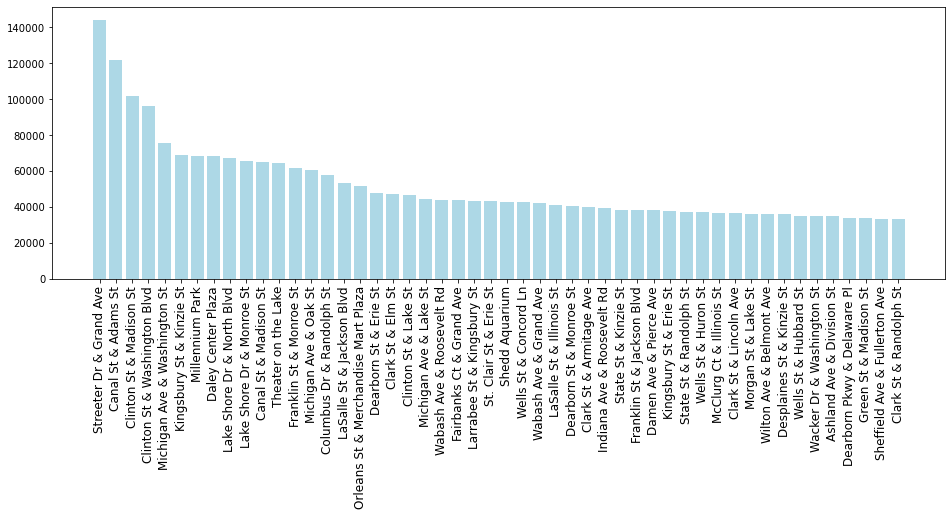

In [45]:
# sorting stations by highest total trips (started and ended trips)

fig, ax = plt.subplots(figsize=[16,5])
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90,fontsize=12)
ax.bar(total_trips["station_name"].iloc[:50], total_trips["trips"].iloc[:50], color = "lightblue")

<BarContainer object of 50 artists>

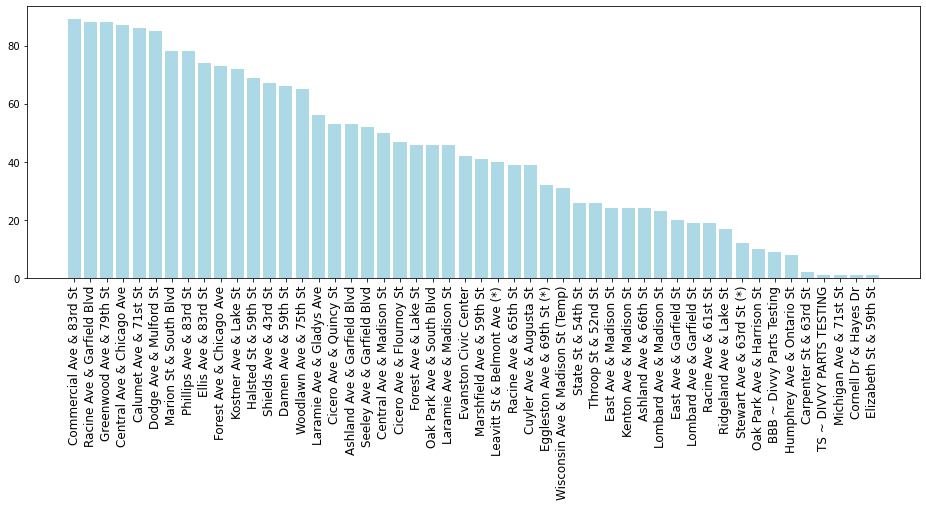

In [46]:
# sorting stations by least total trips (started and ended trips)

fig, ax = plt.subplots(figsize=[16,5])
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90,fontsize=12)
ax.bar(total_trips["station_name"].iloc[-50:], total_trips["trips"].iloc[-50:], color = "lightblue")

## Duration 

In [131]:
a = dt.timedelta(minutes=30)
#amount of Subscribers > 30 min
subscriber_higher30 = chicago_set[(chicago_set["user_type"] == "Subscriber") & (chicago_set["exact_duration"] > a)]
#print("Subscriber > 30 minutes:", len(subscriber_higher30))

#amount of Subscriber < 30 min
subscriber_lower30 = chicago_set[(chicago_set["user_type"] == "Subscriber") & (chicago_set["exact_duration"] <= a)]
#print("Subscriber <= 30 minutes:", len(subscriber_lower30))


#amount of Customer > 30 min
customer_higher30 = chicago_set[(chicago_set["user_type"] == "Customer") & (chicago_set["exact_duration"] > a)]
#print("Customer > 30 minutes:", len(customer_higher30))

#amount of Customer < 30 min
customer_lower30 = chicago_set[(chicago_set["user_type"] == "Customer-up") & (chicago_set["exact_duration"] <= a)]
#print("Customer <= 30 minutes:", len(customer_lower30))

#print("Customers drive more than 2 times over 30 minutes then subscribers. Mentionably is that no custumer driver used the bike less then 30 min, while most subscriber drive under 30 minutes")

Customers drive more than 2 times over 30 minutes then subscribers. Mentionably is that no custumer driver used the bike less then 30 min, while most subscriber drive under 30 minutes

## Utilization

In [48]:
# Calculating the utilization 
#df_new = hour_demand.loc[:,"amount"].div(hour_demand["bike_amount"], axis=0)

Text(0, 0.5, 'Demand')

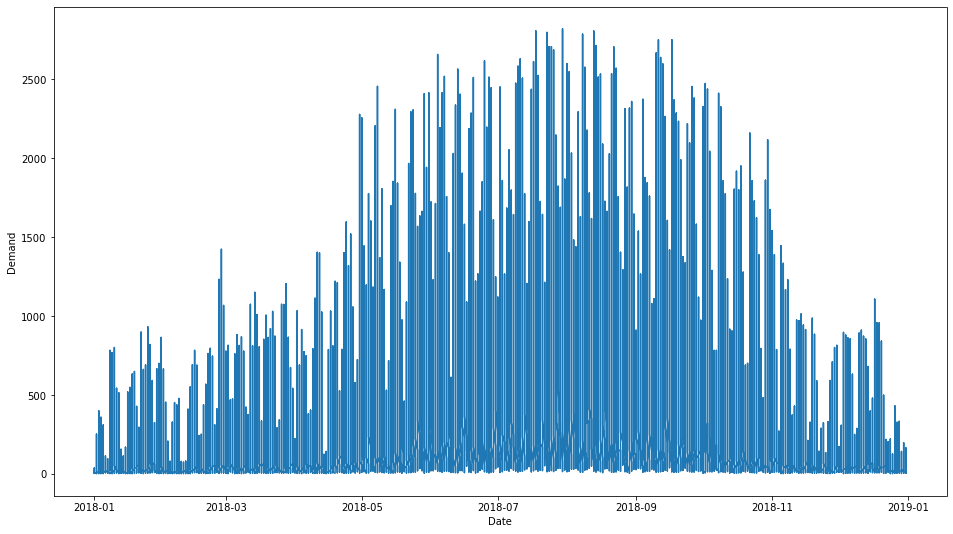

In [49]:
fig, ax = plt.subplots(figsize = (16,9))

# Plotting the utilization data
ax.plot(hour_demand["date_time"],hour_demand[["amount"]])
ax.set_xlabel("Date")
ax.set_ylabel("Demand")

#plt.show()

The bike utilization is almost never utilized for more than 5% over a day

## Biking Duration 

In [50]:
chicago_set["minutes"] = chicago_set["exact_duration"].apply(lambda x:int(x.total_seconds() / 60))
chicago_set

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration,minutes
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19,8
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25,20
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00,16
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14,7
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49,11
...,...,...,...,...,...,...,...,...,...,...
3589933,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50,18
3589934,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22,4
3589935,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20,7
3589936,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47,14


In [51]:
chicago_set.describe()

,start_station_id,end_station_id,bike_id,exact_duration,minutes
count,3.589931e+06,3.589931e+06,3.589931e+06,3589931,3.589931e+06
mean,1.894021e+02,1.900455e+02,3.484015e+03,0 days 00:18:17.297849178,1.779685e+01
std,1.404941e+02,1.404341e+02,1.934124e+03,0 days 00:33:32.066485935,3.353579e+01
min,2.000000e+00,2.000000e+00,1.000000e+00,0 days 00:01:01,1.000000e+00
25%,7.600000e+01,7.600000e+01,1.783000e+03,0 days 00:06:37,6.000000e+00
50%,1.650000e+02,1.660000e+02,3.600000e+03,0 days 00:11:15,1.100000e+01
75%,2.840000e+02,2.840000e+02,5.215000e+03,0 days 00:20:11,2.000000e+01
max,6.640000e+02,6.640000e+02,6.471000e+03,0 days 23:57:35,1.437000e+03


The average duration of a ride is around 18 minutes and 17 seconds

# Clustering

In [52]:
chicago_set["exact_duration"].max()
chicago_set["exact_duration"].min()
chicago_set["exact_duration"].mean()

Timedelta('0 days 00:18:17.297849178')

In [53]:
chicago_int = chicago_set[[]]

In [54]:
chicago_int["duration_hour"] = chicago_set["exact_duration"].dt.components['hours']
#chicago_int["duration_minutes"] = chicago_preped["duration"].dt.components['minutes']
chicago_int['month'] = chicago_set['start_time'].dt.month
chicago_int['weekday'] = chicago_set['start_time'].dt.day
chicago_int['hour'] = chicago_set['start_time'].dt.hour
#chicago_int['minute'] = chicago_preped['start_time'].dt.minute

<ipython-input-54-b5bab18bf72e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_int["duration_hour"] = chicago_set["exact_duration"].dt.components['hours']
<ipython-input-54-b5bab18bf72e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_int['month'] = chicago_set['start_time'].dt.month
<ipython-input-54-b5bab18bf72e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [55]:
chicago_int.head()

,duration_hour,month,weekday,hour
0,0,4,1,0
1,0,4,1,0
2,0,4,1,0
3,0,4,1,0
4,0,4,1,0


In [56]:
from sklearn.preprocessing import StandardScaler
chicago_small = chicago_int.sample(100000)
scaler = StandardScaler()
scaler.fit(chicago_small)
chicago_scaled = scaler.transform(chicago_small)

# create a df out of array
scaled_df = pd.DataFrame(chicago_scaled, columns= chicago_small.columns , index=chicago_small.index)
scaled_df.head()




,duration_hour,month,weekday,hour
3554981,-0.119369,-1.536106,1.137101,-0.361262
1579486,-0.119369,-0.004575,1.587988,1.540718
2345205,-0.119369,0.761190,0.009883,-1.206587
2807928,-0.119369,1.144072,0.686214,0.484063
511041,-0.119369,-0.770341,1.137101,0.906725


In [57]:
chicago_small.count()

duration_hour    100000
month            100000
weekday          100000
hour             100000
dtype: int64

In [58]:
from sklearn.cluster import KMeans

In [59]:
k_max = 20 

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(chicago_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

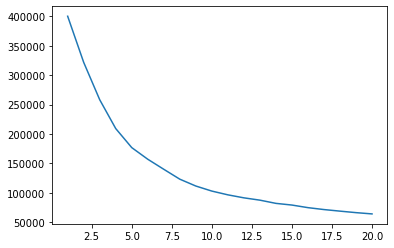

In [60]:
plt.plot(clusters, losses)
plt.show()

(0.0, 10.0)

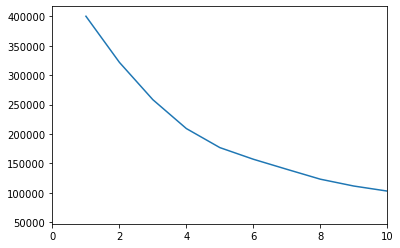

In [61]:
plt.plot(clusters, losses)
plt.xlim([0,10])

(1.0, 8.0)

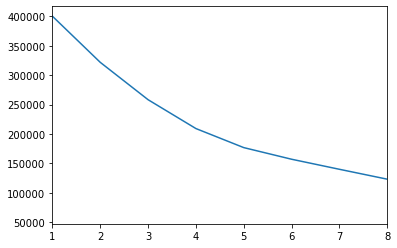

In [62]:
plt.plot(clusters, losses)
plt.xlim([1,8])

Suspect : Cluster between 2 and 6 , sharpest fold at 5

In [63]:
# refit algorithm
means_five = KMeans(n_clusters=5)
means_five.fit(chicago_scaled)

# match records to clusters by calling predict
means_five.predict(chicago_scaled)

array([1, 0, 2, ..., 1, 0, 4], dtype=int32)

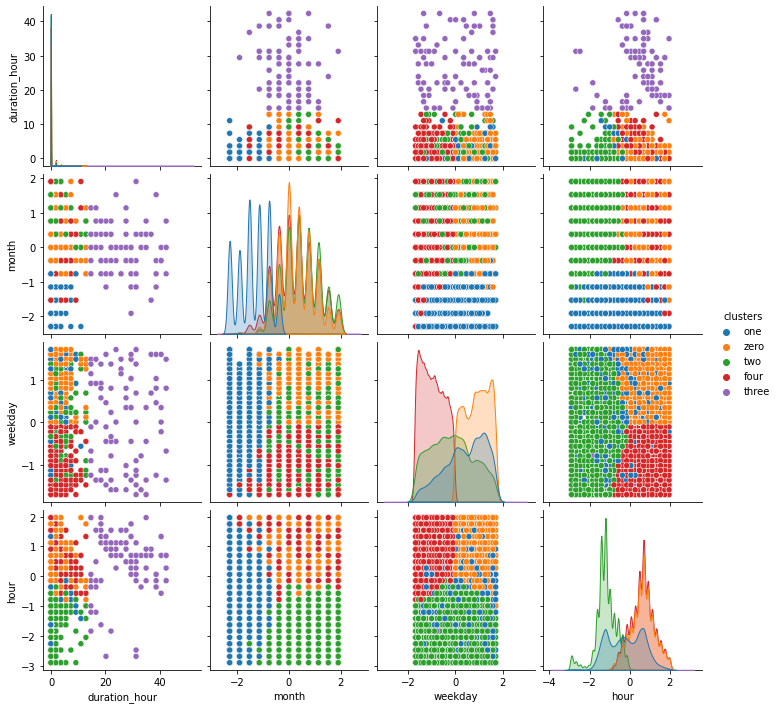

In [64]:
numbers = ["zero", "one", "two", "three","four","five","six"]
scaled_df["clusters"] = means_five.predict(chicago_scaled)
scaled_df["clusters"] = scaled_df["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data= scaled_df, hue="clusters")

for comparison the same clusters with unscaled date (better for interpretation , clearer values)

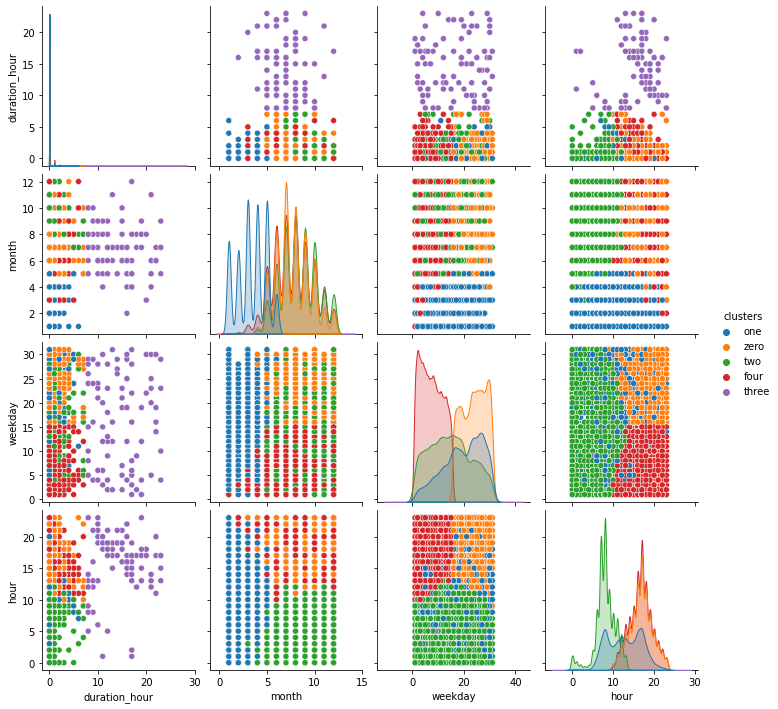

In [65]:
chicago_small["clusters"] = scaled_df["clusters"]
sns.pairplot(data= chicago_small, hue="clusters")

In [66]:
scaled_df.drop('clusters',axis = 1, inplace = True)

In [67]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


dendo_sample = scaled_df.sample(150)

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    plt.show()

In [68]:
scaled_df.head()

,duration_hour,month,weekday,hour
3554981,-0.119369,-1.536106,1.137101,-0.361262
1579486,-0.119369,-0.004575,1.587988,1.540718
2345205,-0.119369,0.761190,0.009883,-1.206587
2807928,-0.119369,1.144072,0.686214,0.484063
511041,-0.119369,-0.770341,1.137101,0.906725


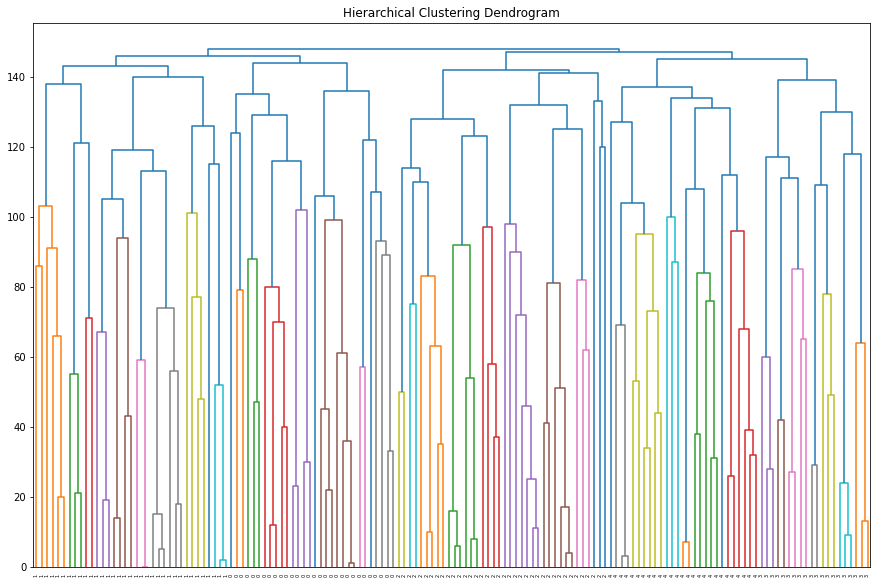

In [69]:
#plot
agglo = AgglomerativeClustering(n_clusters=5)
y_pred_agglo = agglo.fit_predict(dendo_sample)

plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, labels=agglo.labels_)

# 

# Task 2: Predictive Analysis

## Preparation

In [70]:
# read csv file
weather_data = pd.read_csv("weather_hourly_chicago.csv", low_memory = False)

#only keep 2018
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])

weather_data = weather_data[weather_data['date_time'].dt.year == 2018]

#deleting the last hour of 2017
last_hour_2017 = pd.to_datetime('2018-01-01 00:00:00')
weather_data = weather_data[weather_data['date_time'] != last_hour_2017]

weather_data = weather_data.sort_values(by='date_time')

weather_data.reset_index(drop = True)

,date_time,max_temp,min_temp,precip
0,2018-01-01 01:00:00,-15.0,-15.0,0.0
1,2018-01-01 02:00:00,-15.6,-15.6,0.0
2,2018-01-01 03:00:00,-16.7,-16.7,0.0
3,2018-01-01 04:00:00,-17.2,-17.2,0.0
4,2018-01-01 05:00:00,-17.8,-17.8,0.0
...,...,...,...,...
8732,2018-12-31 18:00:00,3.3,2.8,1.0
8733,2018-12-31 19:00:00,3.3,3.3,1.0
8734,2018-12-31 20:00:00,3.9,3.3,1.0
8735,2018-12-31 22:00:00,3.3,3.3,0.0


In [71]:
chicago_set = pd.read_pickle("chicago_set.pkl")
chicago_set

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,exact_duration
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49
...,...,...,...,...,...,...,...,...,...
3589933,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50
3589934,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22
3589935,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20
3589936,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47


In [72]:
weather_data.describe()

,max_temp,min_temp,precip
count,8737.000000,8737.000000,8737.000000
mean,10.596166,10.525009,0.100836
std,11.932221,11.921215,0.301128
min,-22.800000,-22.800000,0.000000
25%,1.100000,1.100000,0.000000
50%,9.400000,9.400000,0.000000
75%,21.100000,21.100000,0.000000
max,36.100000,36.100000,1.000000


# 

## Merging Weather Dataset and Chicago Dataset 

In [73]:
hour_demand

,hour,date_time,amount,bike_amount,user types
0,0,2018-01-01,7,6133,Subscriber
1,1,2018-01-01,14,6133,Subscriber
2,2,2018-01-01,10,6133,Customer
3,3,2018-01-01,2,6133,Subscriber
4,4,2018-01-01,2,6133,Subscriber
...,...,...,...,...,...
8739,19,2018-12-31,41,6133,Subscriber
8740,20,2018-12-31,28,6133,Subscriber
8741,21,2018-12-31,22,6133,Subscriber
8742,22,2018-12-31,25,6133,Subscriber


In [74]:
#amount of bike rentings gouped by hours

time_zero = pd.to_datetime('2018-01-01 00:00:00')
hour_demand2 = pd.DataFrame({'amount': chicago_set.groupby(chicago_set['start_time'].apply(lambda x: x.replace(minute = 0, second= 0))).size()})
hour_demand2.reset_index(inplace=True)
hour_demand2 = hour_demand2.rename(columns = {'start_time':'date_time'})
one_hour = pd.to_timedelta('0 days 01:00:00')
hour_demand2['date_time'] = hour_demand2['date_time']+one_hour
hour_demand2['hour_from_zero'] = hour_demand2['date_time'].apply(lambda x: get_total_hours(x-time_zero))
hour_demand2['station_id'] = chicago_set['start_station_id']

#indexNames = hour_demand2[ (hour_demand2['station_id'] != 35)].index
#hour_demand2.drop(indexNames , inplace=True)

hour_demand2.head(100)

,date_time,amount,hour_from_zero,station_id
0,2018-01-01 01:00:00,7,1,22
1,2018-01-01 02:00:00,14,2,157
2,2018-01-01 03:00:00,10,3,106
3,2018-01-01 04:00:00,2,4,241
4,2018-01-01 05:00:00,2,5,228
...,...,...,...,...
95,2018-01-05 02:00:00,5,98,164
96,2018-01-05 03:00:00,3,99,317
97,2018-01-05 04:00:00,1,100,69
98,2018-01-05 05:00:00,3,101,36


In [75]:
hour_demand2.count()

date_time         8744
amount            8744
hour_from_zero    8744
station_id        8744
dtype: int64

In [76]:
# join demand and weather

weather_demand = pd.merge(weather_data, hour_demand2, how="left", on=['date_time', 'date_time'])
#weather_demand = pd.merge(weather_data, hour_demand)

#replacing NaN in amount values with 0
weather_demand['amount'] = weather_demand['amount'].fillna(0)
#replacing NaN values with the actual hours from zero
weather_demand['hour_from_zero'] = weather_demand['hour_from_zero'].fillna(weather_demand['date_time'].apply(lambda x: get_total_hours(x-time_zero)))

#converting values to integer
weather_demand['precip'] = weather_demand['precip'].astype(int)
weather_demand['amount'] = weather_demand['amount'].astype(int)
weather_demand['hour_from_zero'] = weather_demand['hour_from_zero'].astype(int)

#weather_demand.dropna(subset=['station_id
weather_demand['station_id'] = weather_demand['station_id'].fillna(35)

weather_demand.head(5)

,date_time,max_temp,min_temp,precip,amount,hour_from_zero,station_id
0,2018-01-01 01:00:00,-15.0,-15.0,0,7,1,22.0
1,2018-01-01 02:00:00,-15.6,-15.6,0,14,2,157.0
2,2018-01-01 03:00:00,-16.7,-16.7,0,10,3,106.0
3,2018-01-01 04:00:00,-17.2,-17.2,0,2,4,241.0
4,2018-01-01 05:00:00,-17.8,-17.8,0,2,5,228.0


In [77]:
weather_demand.count()

date_time         8737
max_temp          8737
min_temp          8737
precip            8737
amount            8737
hour_from_zero    8737
station_id        8737
dtype: int64

### Based on our knowledge we got from task 


In [78]:
# add time of day, dayofweek (06) and isweekday (T/F) to weather_demand, 

weather_demand['day_of_week'] = weather_demand['date_time'].apply(lambda x: x.weekday())
weather_demand['hour_of_the_day'] = weather_demand['date_time'].apply(lambda x: x.hour)
weather_demand["month"] = weather_demand["date_time"].apply(lambda x: x.month)

#drop date_time and min_temp
weather_demand = weather_demand.drop("date_time", axis = 1)
weather_demand = weather_demand.drop("min_temp", axis = 1)

# setting the index to hour_from_zero
weather_demand = weather_demand.set_index("hour_from_zero")

weather_demand.dropna()

weather_demand.head(10)

,max_temp,precip,amount,station_id,day_of_week,hour_of_the_day,month
hour_from_zero,,,,,,,
1,-15.0,0,7,22.0,0,1,1
2,-15.6,0,14,157.0,0,2,1
3,-16.7,0,10,106.0,0,3,1
4,-17.2,0,2,241.0,0,4,1
5,-17.8,0,2,228.0,0,5,1
6,-18.3,0,3,244.0,0,6,1
7,-19.4,0,5,128.0,0,7,1
8,-20.0,0,5,130.0,0,8,1
9,-20.6,0,7,130.0,0,9,1


### Ploting the  amount as a function of the features of the merged Dateset (as scatterplots):


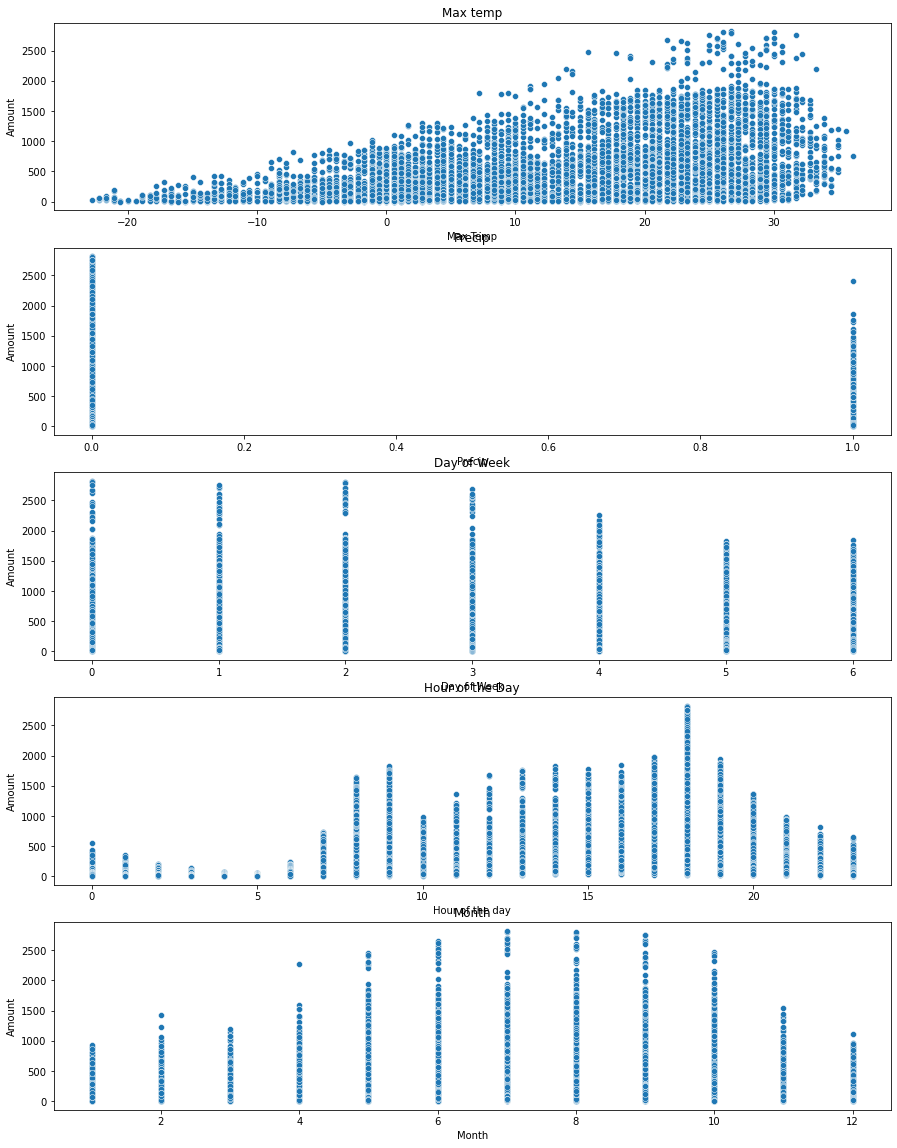

In [79]:
# plt.subplot syntax: (# of rows, # of columns, plot number)


Fig_4, axes = plt.subplots(nrows = 5, ncols = 1, figsize= (15,20))

# subplot no. 1
plt.subplot(5,1,1)
plt.xlabel('Max Temp')
plt.ylabel('Amount')
plt.title('Max temp')
sns.scatterplot(x=weather_demand["max_temp"], y=weather_demand["amount"])

# subplot no. 2
plt.subplot(5,1,2)
plt.xlabel('Precip')
plt.ylabel('Amount')
plt.title('Precip')
sns.scatterplot(x=weather_demand["precip"], y=weather_demand["amount"])

# subplot no. 3
plt.subplot(5,1,3)
plt.xlabel('Day of Week')
plt.ylabel('Amount')
plt.title('Day of Week')
sns.scatterplot(x=weather_demand["day_of_week"], y=weather_demand["amount"])

# subplot no. 4
plt.subplot(5,1,4)
plt.xlabel('Hour of the day')
plt.ylabel('Amount')
plt.title('Hour of the Day')
sns.scatterplot(x=weather_demand["hour_of_the_day"], y=weather_demand["amount"])

# subplot no. 5
plt.subplot(5,1,5)
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Month')
sns.scatterplot(x=weather_demand["month"], y=weather_demand["amount"])


plt.show()

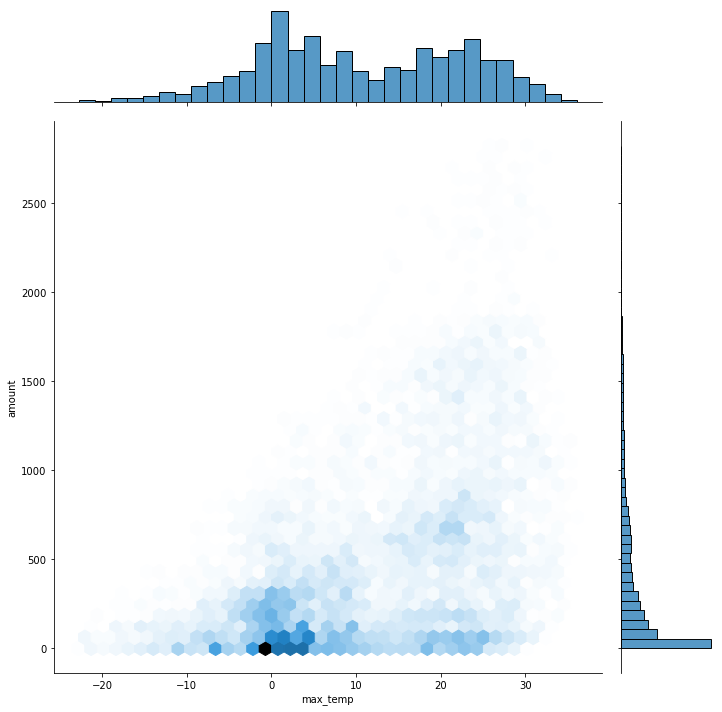

In [80]:
sns.jointplot(x = "max_temp", y = "amount", data = weather_demand, kind = "hex", height=10, palette = "OrRd")

### Saving the cleansed Dataset 

In [81]:
weather_demand.to_pickle("weather_set.pkl")

# 

# Polynomial Regression

In [82]:
weather_set = pd.read_pickle("weather_set.pkl")

In [83]:
weather_set.head(3)

,max_temp,precip,amount,station_id,day_of_week,hour_of_the_day,month
hour_from_zero,,,,,,,
1,-15.0,0,7,22.0,0,1,1
2,-15.6,0,14,157.0,0,2,1
3,-16.7,0,10,106.0,0,3,1


## Split into Training Set and Test Set 

In [84]:
X = weather_set.drop(columns = ["amount"])
y = weather_set["amount"]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 1 to 8759
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   max_temp         8737 non-null   float64
 1   precip           8737 non-null   int64  
 2   station_id       8737 non-null   float64
 3   day_of_week      8737 non-null   int64  
 4   hour_of_the_day  8737 non-null   int64  
 5   month            8737 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 477.8 KB


In [85]:
# split the data with 70-30% split as above

x_train, x_test, y_train, y_test = train_test_split(weather_set.drop(columns = ["amount"]), weather_set["amount"], test_size=0.3,random_state=42)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

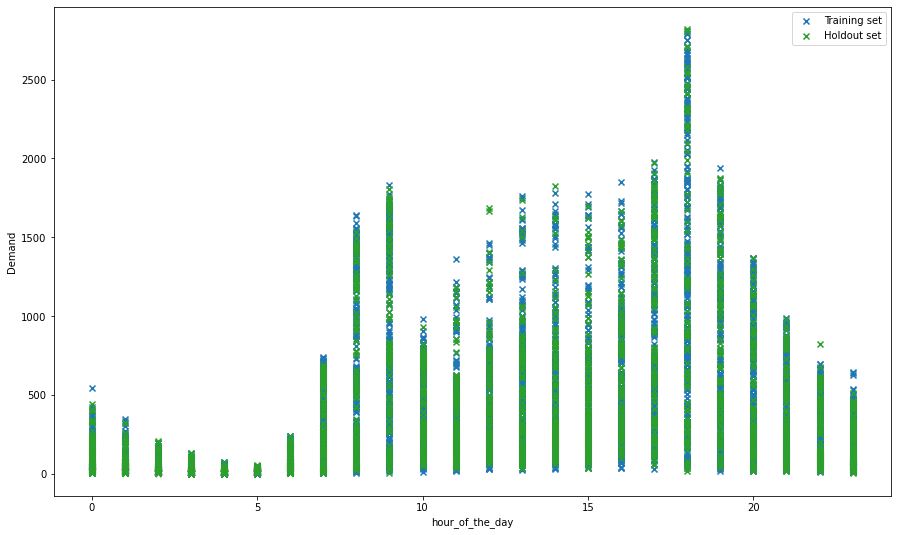

In [86]:
plt.figure(figsize = (15,9))
plt.scatter(x_train['hour_of_the_day'], y_train, marker='x', color="C0")
plt.scatter(x_test['hour_of_the_day'], y_test, marker='x', color="C2")
plt.xlabel("hour_of_the_day")
plt.ylabel("Demand")
plt.legend(['Training set', 'Holdout set'])
plt.show()

In [87]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X)
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(0,24 ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (15,9))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("hour")
    plt.ylabel("amount")
    plt.xlim([0,24]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for the curve (degree = {}) is:'.format(d),r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

The R^2 for the curve (degree = 8) is: 0.3847003892099805


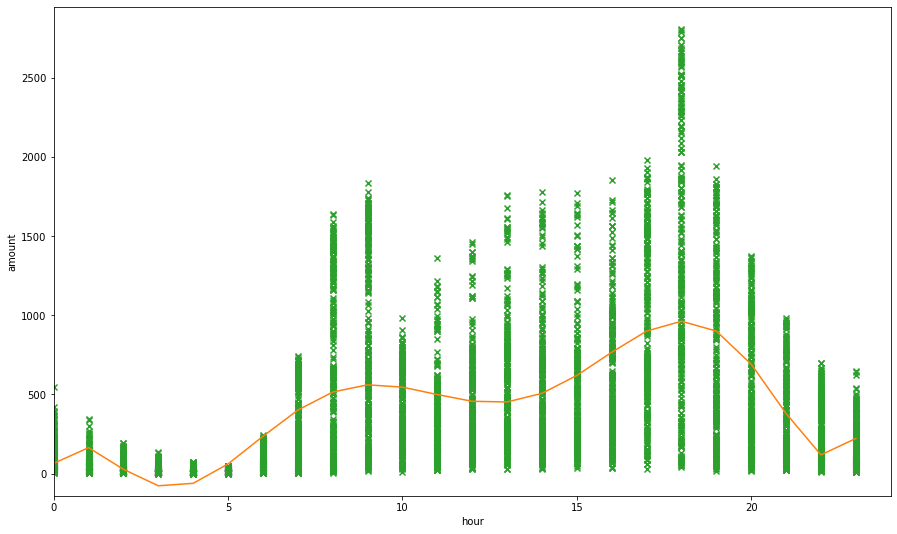

In [88]:
xt = pd.DataFrame(x_train['hour_of_the_day'])
plot_regression_poly_scikit(X = xt, Y = y_train, d = 8)

In [89]:
# initialize linear model
linear_model = LinearRegression(fit_intercept=True, normalize=False)
linear_model

LinearRegression()

In [90]:
# train model
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)

[ 1.69636263e+01 -1.03911242e+02 -7.17926554e-03 -1.65737434e+01
  2.20966268e+01  2.51986979e+00] 19.946043337557057


In [91]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X)
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(0,24 ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("hour")
    plt.ylabel("amount")
    plt.xlim([0,24]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for the curve (degree = {}) is:'.format(d),r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

In [92]:
# Fitting Polynomial Regression to Multiple Linear Regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)



LinearRegression()

In [93]:
print(pol_reg.coef_, pol_reg.intercept_)

[-1.12460452e+11 -1.73854679e+01 -1.37173776e+01  8.49828137e-01
  4.08457298e+01  1.03949491e+02  4.93059104e+01  2.49958024e-01
 -3.32781395e+00  1.12307084e-02  2.68456743e+00  1.34564078e+00
  2.71502411e-01 -1.37173776e+01 -8.17558717e-02 -1.56963182e-03
 -4.07155889e+00  1.21933760e+00 -8.09695556e-04 -3.93483092e-02
 -9.92192834e-03 -4.75631348e-02 -1.26173597e+01  3.17902707e-02
  2.62184261e-01 -4.31071311e+00  5.42641874e-01 -3.01875031e+00] 112460451731.97998


In [94]:
def ls_poly(X, y, d):
    
    # Create polynomial features
    min_X, max_X = X.min(), X.max()
    xs = 2*(X - min_X)/(max_X - min_X)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    return theta

In [95]:
# Splitting data

#define X and y vectors
xa = weather_set["hour_of_the_day"]
ya = weather_set["amount"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(xa, ya, test_size=0.3,random_state=42)


Text(0, 0.5, 'Mean squared error')

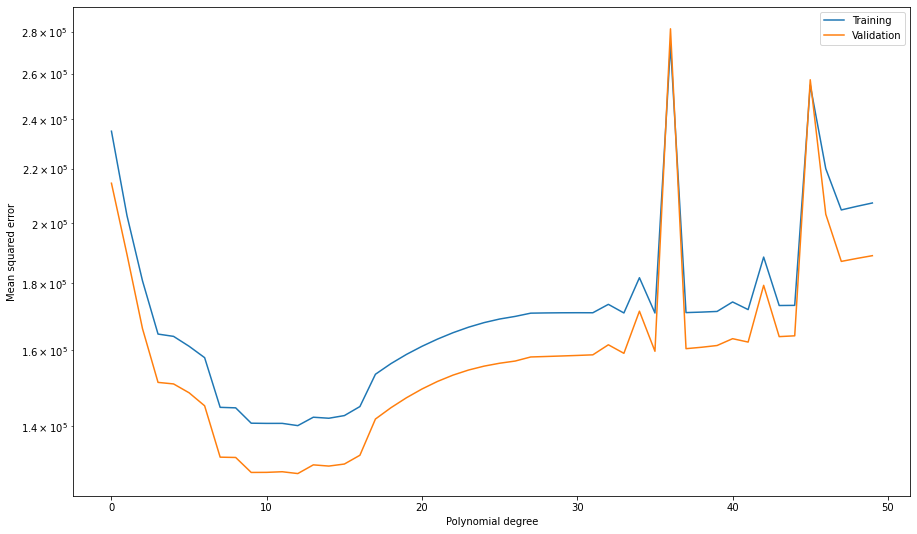

In [96]:
# Visualizing test and train set

# define loop 
err_train = []
err_test = []
for deg in range(50): # we want to loop across 0-50 degrees
    
    # create poly features
    poly_feat = PolynomialFeatures(degree=deg) #initialize
    
    X_train_poly=poly_feat.fit_transform(X_train.values.reshape((-1,1)))
    X_test_poly=poly_feat.fit_transform(X_test.values.reshape((-1,1)))
    
    # initialize and fit model
    lin_mod_poly = LinearRegression()
    lin_mod_poly.fit(X_train_poly,y_train)
    
    # compute errors and append to err_train and err_cv
    err_train.append(mean_squared_error(y_train,lin_mod_poly.predict(X_train_poly)))
    err_test.append(mean_squared_error(y_test,lin_mod_poly.predict(X_test_poly)))

# plot results
plt.figure(figsize = (15,9))    
plt.semilogy(range(50), err_train, range(50), err_test)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

In [97]:
# Split data into train, test and holdout set

# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(xa, ya, test_size=0.3,random_state=34 )

# Split X_train to achive 50-20-30 split
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=34 )

In [98]:
print(len(X_train),len(X_hold),len(X_test))

4367 1748 2622


Text(0, 0.5, 'Mean squared error')

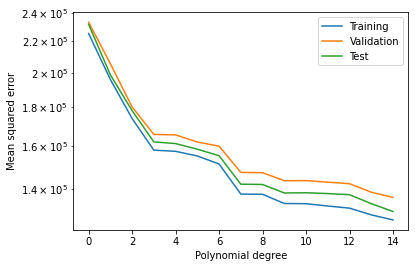

In [99]:
#Visualizing train, test and holdout sets

min_x_train, max_x_train = X_train.min(), X_train.max()
x_train = 2*(X_train - min_x_train)/(max_x_train - min_x_train) - 1
x_hold = 2*(X_hold - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(X_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_hold = []
err_test = []
for i in range(15):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_hold.append(((poly_feat(x_hold,i) @ theta - y_hold)**2).mean())
    err_test.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())
plt.semilogy(range(15), err_train, range(15), err_hold,range(15), err_test)
plt.legend(["Training", "Validation", "Test"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

In [100]:
# Prediction 
y_true = weather_set["amount"]
y_pred = pol_reg.predict(poly_reg.fit_transform(X))


# Evaluation of Polynomial Regression Algorithm


In [101]:
#(Root) Mean Squared Error ((R)MSE)
print("Mean Squared Error:",mean_squared_error(y_pred, y_true),"(Bike rentings)^2")
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5,"Bike rentings")
print("Demand Mean:",weather_set["amount"].mean())

Mean Squared Error: 118347.0453001745 (Bike rentings)^2
Root Mean Squared Error: 344.01605384076845 Bike rentings
Demand Mean: 409.1724848346114


In [102]:
#Mean Absolute Error (MAE)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_true),"Bike rentings")

Mean Absolute Error: 252.012316960198 Bike rentings


In [103]:
#Coefficient of Determination ( 𝑅2 )
print("Coefficient of determination:",r2_score(y_pred, y_true))

Coefficient of determination: 0.07056491251903685


## Predictions

In [105]:
Xnew = np.array([[28,0,4,2,15,12]], dtype=int) 
print("Exact prediction:", pol_reg.predict(poly_reg.fit_transform(Xnew))[0])

Exact prediction: 1040.6101684570312


In [106]:
Xnew = np.array([[28,1,4,2,15,12]])
print("Exact prediction:", pol_reg.predict(poly_reg.fit_transform(Xnew))[0])

Exact prediction: 873.2251281738281


# Decision Tree

Try different depths in order to get the best fit using r^2

In [107]:
depths = [None, 2,3,4,5,6,7,8,9,10,15,20,25,50 ,100 ]
scores_mean = []

In [108]:
for depth_ in depths:
    regressor = DecisionTreeRegressor(max_depth = depth_)
# regressor.fit(weather_demand_final[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
#               weather_demand_final['amount'])


    regressor.fit(weather_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  weather_set['amount'])
    
    scores = cross_val_score(regressor, weather_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                          weather_set['amount'], scoring='r2', cv=10)
    scores_mean.append((depth_, scores.mean()))
    #print(depth_, scores.mean())



In [109]:
scores_mean

[(None, 0.63802547067216),
 (2, 0.1609724186882148),
 (3, 0.27984390951425886),
 (4, 0.39388664534334067),
 (5, 0.42996822948075986),
 (6, 0.514205068543068),
 (7, 0.579197479980392),
 (8, 0.6182836049916183),
 (9, 0.6695757517161415),
 (10, 0.6792963206271362),
 (15, 0.6482939590738664),
 (20, 0.6374210734805523),
 (25, 0.6403123099939575),
 (50, 0.6357368284465575),
 (100, 0.6351250024959484)]

### Plot the R^2 values for different Depths

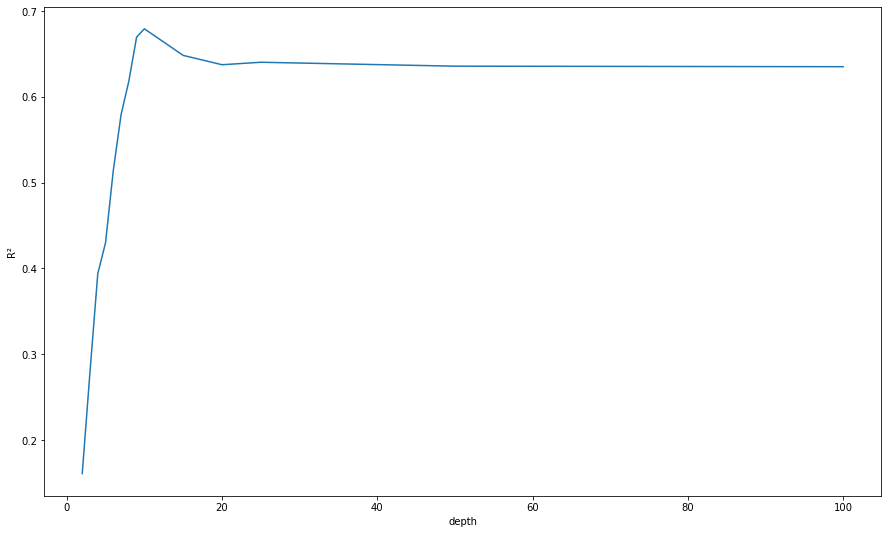

In [110]:
#plotting depths and R² 
fig, ax = plt.subplots(figsize = (15,9))
x,y = zip(*scores_mean)

ax.plot(x,y)
ax.set_xlabel("depth")
ax.set_ylabel("R²")

plt.show()

In [111]:
max(scores_mean ,key=lambda item:item[1])

(10, 0.6792963206271362)

Using depth = 10, trying different number of splits

In [112]:
regressor = DecisionTreeRegressor(max_depth=10)
regressor

DecisionTreeRegressor(max_depth=10)

In [113]:
number_of_splits = []
for i in range (2,15):
    number_of_splits.append(i)

In [114]:
scores_mean = []
for num in number_of_splits:
    scores = cross_val_score(regressor, weather_set[['max_temp', 'precip', 'day_of_week', 
                                                                'hour_of_the_day', 'month']], 
                              weather_set['amount'], scoring = 'r2', cv= num)
    scores_mean.append((num, scores.mean()))
# scores_mean

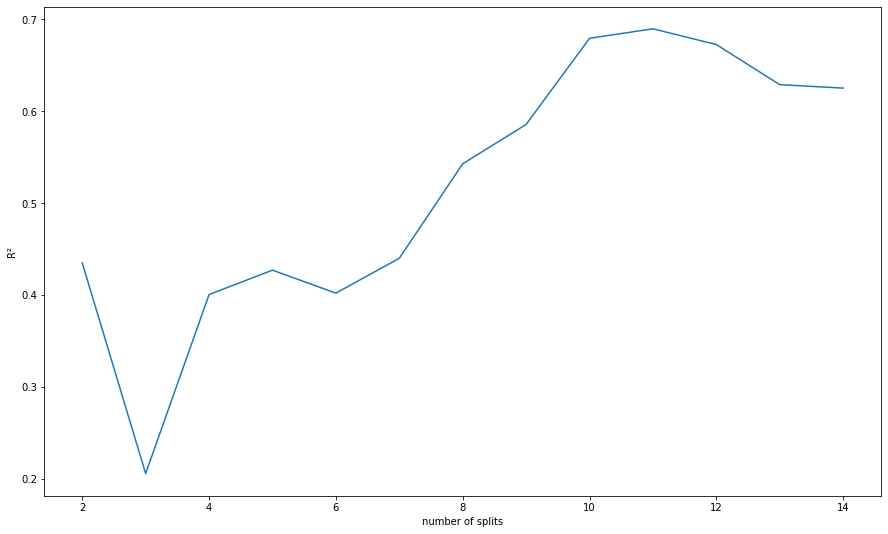

In [115]:
#plotting depths and R² 
fig, ax = plt.subplots(figsize = (15,9))
x,y = zip(*scores_mean)

ax.plot(x,y)
ax.set_xlabel("number of splits")
ax.set_ylabel("R²")

plt.show()

In [116]:
print("Number of Splits, R²:", max(scores_mean ,key=lambda item:item[1]))

Number of Splits, R²: (11, 0.6894547648702637)


In [117]:
# Search for best combination of splits and depth to check if it's the same as it was when we searched for best values seperately
scores_mean2 = []
for depth_ in depths:
    for num in number_of_splits:
        regressor = DecisionTreeRegressor(max_depth = depth_)
        regressor.fit(weather_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  weather_set['amount'])
    
        scores = cross_val_score(regressor, weather_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                          weather_set['amount'], scoring='r2', cv=num)
        scores_mean2.append((depth_, num, scores.mean()))
        

In [118]:
print("Depth, Number of Splits, R²:", max(scores_mean2 ,key=lambda item:item[2]))

Depth, Number of Splits, R²: (10, 11, 0.6909283037744035)


Best combination depth 10, number of splits 11
Get different scores (MAE, MSE, RMSE)

In [119]:
scorers = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [120]:
regressor = DecisionTreeRegressor(max_depth=8)
for scorer in scorers:
    scores = -cross_val_score(regressor,weather_set[['max_temp', 'precip', 'day_of_week', 
                                                            'hour_of_the_day', 'month']], 
                          weather_set['amount'], scoring = scorer, cv=11)
    print(scorer)
    print(scores)
    print("mean:", scores.mean())
    print("")

neg_mean_absolute_error
[ 68.1973017   76.46129109  61.62659891 114.17605262 136.63886843
 133.99022071 138.52753796 143.18298435 159.44265868 116.54337691
 100.39378767]
mean: 113.56187991308629

neg_mean_squared_error
[16083.9425819  24544.69029236 11159.59500288 33956.31033496
 49106.95480108 47885.01700236 43247.72623492 58177.99819233
 69055.10476653 36250.77366268 39782.23502024]
mean: 39022.75889929367

neg_root_mean_squared_error
[126.82248453 156.77344808 105.63898429 184.27382636 221.72496156
 218.96316099 207.96087669 241.20115711 262.66109651 190.39683895
 199.45484456]
mean: 192.35197087621046



In [121]:
# min_samples_split: int, float, optional (default=2)
# The minimum number of samples required to split an internal node
sp = [2,3,4,5,6,7,8,9,10]
scores_mean = []

In [122]:
for sp_ in sp:    
    regressor = DecisionTreeRegressor(max_depth=8, min_samples_split = sp_)
    regressor.fit(weather_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  weather_set['amount'])
    scores = cross_val_score(regressor, weather_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                             weather_set['amount'], scoring='r2', cv=11)
    scores_mean.append((sp_, scores.mean()))

In [123]:
print("min_sample_split, R²", max(scores_mean ,key=lambda item:item[1]))

min_sample_split, R² (10, 0.6533053487928879)


In [124]:
regressor = DecisionTreeRegressor(max_depth=8, min_samples_split = 8)
regressor.fit(weather_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  weather_set['amount'])

DecisionTreeRegressor(max_depth=8, min_samples_split=8)

In [125]:
#create a list for our final scores
final_values = []
# add r^2 value to final_values
final_values.append((max(scores_mean ,key=lambda item:item[1]))[1])

In [126]:
for scorer in scorers:
    scores = -cross_val_score(regressor,weather_set[['max_temp', 'precip', 'day_of_week', 
                                                            'hour_of_the_day', 'month']], 
                          weather_set['amount'], scoring = scorer, cv=11)
    final_values.append(scores.mean())
    print(scorer)
    print(scores)
    print("mean:", scores.mean(), "\n")

neg_mean_absolute_error
[ 68.09545384  76.08944623  61.37896788 114.1847428  136.03459831
 133.98556076 138.5974372  140.945162   159.52091225 116.66344408
 100.22974485]
mean: 113.24777001852391 

neg_mean_squared_error
[16035.53590167 24396.35564742 11122.76544592 33947.76197854
 48983.92024355 47866.25411823 43244.50614676 57025.14517416
 68900.49251632 36252.03380821 39749.46746671]
mean: 38865.83985886356 

neg_root_mean_squared_error
[126.63149648 156.19332779 105.46452221 184.24918447 221.2852079
 218.78357826 207.9531345  238.79938269 262.48903314 190.39966861
 199.37268486]
mean: 191.96556553841125 



Performs slightly better than with default value on all scorers.
Final Evaluation Values:

In [127]:
print("R²:", round(final_values[0], 4))
print("MAE:", round(final_values[1], 4))
print("MSE:", round(final_values[2], 4))
print("RSME:", round(final_values[3], 4))

R²: 0.6533
MAE: 113.2478
MSE: 38865.8399
RSME: 191.9656


In [132]:
Xnew = np.array([[28,0,4,20,7]]) 
print("Predicted amount:", regressor.predict(Xnew))

Predicted amount: [905.52173913]


In [133]:
Xnew = np.array([[15,0,4,20,1]]) 
print("Predicted amount:", regressor.predict(Xnew))

Predicted amount: [507.]
